### Milestone 1: Model Code

In [27]:
# Importing necessary libraries
import pandas as pd
import numpy as np
import re
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score

In [20]:
# Load the dataset
df = pd.read_csv(r"C:\Users\Jarshana Shrestha\Desktop\takeo\week9\amazon_review.csv")

#preview the Dataset
df.head()

,Id,ProductId,UserId,ProfileName,HelpfulnessNumerator,HelpfulnessDenominator,Score,Time,Summary,Text
0,1,B001E4KFG0,A3SGXH7AUHU8GW,delmartian,1,1,5,1303862400,Good Quality Dog Food,I have bought several of the Vitality canned d...
1,2,B00813GRG4,A1D87F6ZCVE5NK,dll pa,0,0,1,1346976000,Not as Advertised,Product arrived labeled as Jumbo Salted Peanut...
2,3,B000LQOCH0,ABXLMWJIXXAIN,"Natalia Corres ""Natalia Corres""",1,1,4,1219017600,"""Delight"" says it all",This is a confection that has been around a fe...
3,4,B000UA0QIQ,A395BORC6FGVXV,Karl,3,3,2,1307923200,Cough Medicine,If you are looking for the secret ingredient i...
4,5,B006K2ZZ7K,A1UQRSCLF8GW1T,"Michael D. Bigham ""M. Wassir""",0,0,5,1350777600,Great taffy,Great taffy at a great price. There was a wid...


In [21]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 568454 entries, 0 to 568453
Data columns (total 10 columns):
 #   Column                  Non-Null Count   Dtype 
---  ------                  --------------   ----- 
 0   Id                      568454 non-null  int64 
 1   ProductId               568454 non-null  object
 2   UserId                  568454 non-null  object
 3   ProfileName             568428 non-null  object
 4   HelpfulnessNumerator    568454 non-null  int64 
 5   HelpfulnessDenominator  568454 non-null  int64 
 6   Score                   568454 non-null  int64 
 7   Time                    568454 non-null  int64 
 8   Summary                 568427 non-null  object
 9   Text                    568454 non-null  object
dtypes: int64(5), object(5)
memory usage: 43.4+ MB


In [22]:
print(df.describe())

                  Id  HelpfulnessNumerator  HelpfulnessDenominator  \
count  568454.000000         568454.000000            568454.00000   
mean   284227.500000              1.743817                 2.22881   
std    164098.679298              7.636513                 8.28974   
min         1.000000              0.000000                 0.00000   
25%    142114.250000              0.000000                 0.00000   
50%    284227.500000              0.000000                 1.00000   
75%    426340.750000              2.000000                 2.00000   
max    568454.000000            866.000000               923.00000   

               Score          Time  
count  568454.000000  5.684540e+05  
mean        4.183199  1.296257e+09  
std         1.310436  4.804331e+07  
min         1.000000  9.393408e+08  
25%         4.000000  1.271290e+09  
50%         5.000000  1.311120e+09  
75%         5.000000  1.332720e+09  
max         5.000000  1.351210e+09  


In [23]:
# Check missing values
print(df.isnull().sum())

Id                         0
ProductId                  0
UserId                     0
ProfileName               26
HelpfulnessNumerator       0
HelpfulnessDenominator     0
Score                      0
Time                       0
Summary                   27
Text                       0
dtype: int64


In [24]:
# Keep only necessary columns
df = df[["Text", "Score"]]

# Randomly sample 10,000 entries from the dataset
df = df.sample(n=10000, random_state=42)

In [25]:
# Convert Score to sentiment labels (0: negative, 1: positive)
df['label'] = df['Score'].apply(lambda x: 1 if x >= 3 else 0)
df['label'].value_counts()

label
1    8602
0    1398
Name: count, dtype: int64

In [26]:
def clean_text(text):
    text = re.sub(r"http\S+|www\S+", '',text )      # remove links
    text = re.sub(r"[^A-Za-z0-9\s]", '', text)      # remove punctuation
    text = re.sub(r"\s+", ' ', text)                # remove extra spaces
    return text.lower().strip()

df['cleaned_text'] = df['Text'].apply(clean_text)
df[['cleaned_text', 'label']].head()

,cleaned_text,label
165256,having tried a couple of other brands of glute...,1
231465,my cat loves these treats if ever i cant find ...,1
427827,a little less than i expected it tends to have...,1
433954,first there was frosted miniwheats in original...,0
70260,and i want to congratulate the graphic artist ...,1


### Milestone 2: Sentiment Analysis Results

In [28]:
# Split the data
X_train, X_test, y_train, y_test = train_test_split(df['cleaned_text'], df['label'], test_size=0.2, random_state=42)

In [29]:
# TF-IDF Vectorization
vectorizer = TfidfVectorizer(max_features=5000)
X_train_tfidf = vectorizer.fit_transform(X_train)
X_test_tfidf = vectorizer.transform(X_test)

In [30]:
# Train logistic regression 
model = LogisticRegression(max_iter=200)
model.fit(X_train_tfidf, y_train)

LogisticRegression(max_iter=200)

In [31]:
# Predict and evaluate 
y_pred = model.predict(X_test_tfidf)

print("Classification Report:\n", classification_report(y_test, y_pred))
print("Accuracy Score:", accuracy_score(y_test, y_pred))

Classification Report:
               precision    recall  f1-score   support

           0       0.85      0.19      0.31       298
           1       0.88      0.99      0.93      1702

    accuracy                           0.87      2000
   macro avg       0.86      0.59      0.62      2000
weighted avg       0.87      0.87      0.84      2000

Accuracy Score: 0.8745


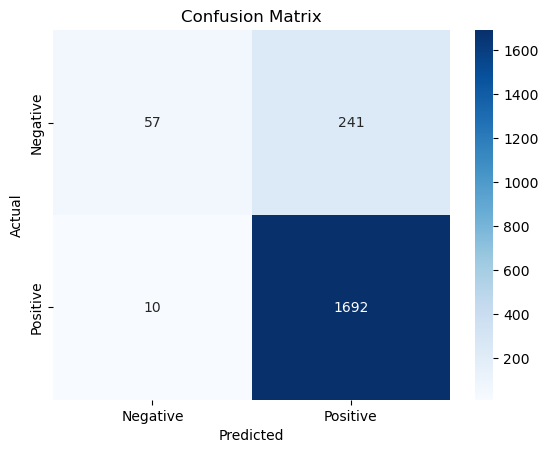

In [32]:
# Confusion Matrix Heatmap
cm = confusion_matrix(y_test, y_pred)
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=['Negative', 'Positive'], yticklabels=['Negative', 'Positive'])
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')
plt.show()

###  Milestone 3: Jupyter Notebook with Documentation

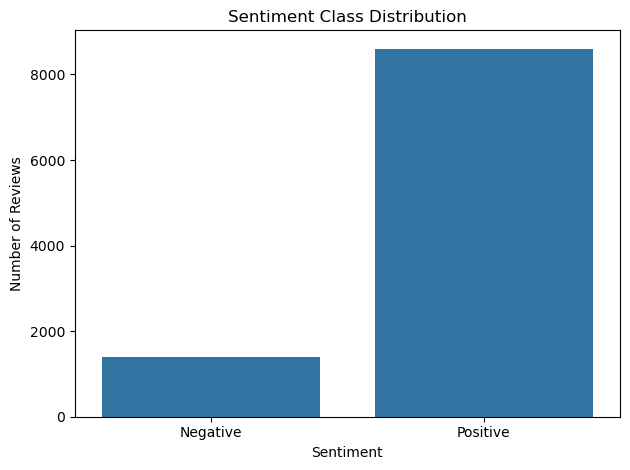

In [37]:
df['text_length'] = df['cleaned_text'].apply(lambda x: len(x.split()))

# Visualize distribution of sentiment classes
sns.countplot(data=df, x='label')
plt.xticks([0, 1], ['Negative', 'Positive'])
plt.title('Sentiment Class Distribution')
plt.xlabel('Sentiment')
plt.ylabel('Number of Reviews')
plt.tight_layout()
plt.show()

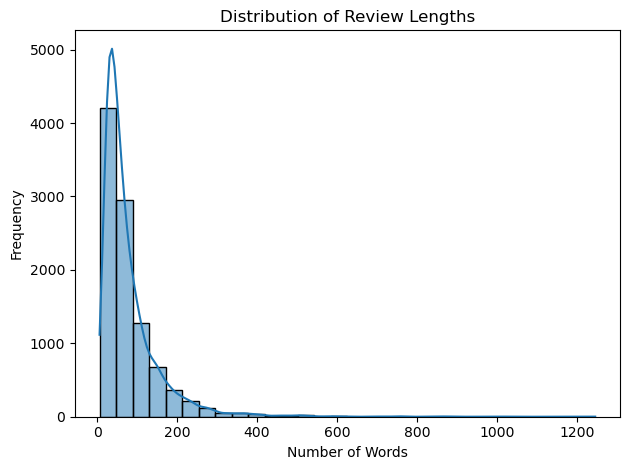

In [38]:
# Visualize review length distribution
sns.histplot(data=df, x='text_length', bins=30, kde=True)
plt.title('Distribution of Review Lengths')
plt.xlabel('Number of Words')
plt.ylabel('Frequency')
plt.tight_layout()
plt.show()

In [40]:
# Function to clean and vectorize new review text
def predict_sentiment(review_text):
    review_cleaned = clean_text(review_text)
    review_vector = vectorizer.transform([review_cleaned])
    prediction = model.predict(review_vector)[0]  # Use your trained logistic regression model
    sentiment = "Positive" if prediction == 1 else "Negative"
    return sentiment

# Interactive prompt to test a new review
def run_sentiment_prediction():
    user_review = input("Enter a product review: ")
    sentiment = predict_sentiment(user_review)
    print(f"\nPredicted Sentiment: {sentiment}")

# Example usage
run_sentiment_prediction()

Enter a product review:  This product exceeded my expectations! Great quality and fast shipping.



Predicted Sentiment: Positive
